### Abstracts

- 

In [2]:
from datascience import *
%matplotlib inline
path_data = '../../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Assessing a Model #
<span class="girk">In data science, a *model* is a set of assumptions about data.</span> Often, models include assumptions about chance processes used to generate data. 

Sometimes, data scientists have to decide whether or not a model is good. In this section we will discuss an example of making such a decision. 

## Jury Selection ##

Data science can be a powerful tool for exposing racism and inequality in our society. This section is about a case where data provided evidence of racial bias in jury selection.

Amendment VI of the United States Constitution states that, "In all criminal prosecutions, the accused shall enjoy the right to a speedy and public trial, by an impartial jury of the State and district wherein the crime shall have been committed." 

One characteristic of an *impartial* jury is that it should be selected from a jury panel that is representative of the population of the relevant region. A jury panel is a group of people chosen to be prospective jurors. The final trial jury is selected from among them by deliberate inclusion or exclusion, and as a result can have any composition. But the larger panel from which the trial jurors are drawn must be representative of the population.

The question of whether a jury panel is indeed representative of a region's population has an important legal implication. If some group in the population was systematically underrepresented on the jury panel, that could raise a question about whether the jury was impartial and hence whether the defendant received due process.

That was the question in the Supreme Court case of Robert Swain, a Black man convicted in Talladega County, Alabama, in 1962. He appealed his indictment all the way to the U.S. Supreme Court on the grounds that Black people were systematically excluded from juries in Talladega County. The Supreme Court denied his appeal and Robert Swain was later sentenced to life imprisonment.

However, our analysis below shows that the data are not in agreement with conclusions drawn by the Court. On the contrary, the data point to bias in the jury selection process. This bias in the criminal justice system reflected the widespread prejudice and injustice prevalent against Black people at the time.

We will start by looking at the numerical details. At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County. In that population, 26% of the men were Black. As is common in jury trials, the jurors in the trial of Robert Swain were selected from a panel of people who were supposed to be representative of the population of eligible jurors. But only eight men among the panel of 100 men (that is, 8%) were Black.

As part of his appeal, Robert Swain questioned this discrepancy. Moreover, he pointed out that all Talladega County jury panels for the past 10 years had contained only a small percent of Black panelists. 

The U.S. Supreme Court reviewed the appeal and concluded, "the overall percentage disparity has been small." But was this assertion reasonable? If jury panelists were selected at random from the county's eligible population, there would be some chance variation. We wouldn't get exactly 26 Black panelists on every 100-person panel. But would we expect as few as eight?

The answer is no. We will establish that and then discuss some of the many biases involved.

## A Model of Random Selection ##

One view of the data – a model, in other words – is that the panel was selected at random and ended up with a small number of Black panelists just due to chance.

Since the panel was supposed to resemble the population of all eligible jurors, the model of random selection is important to assess. Let's see if it stands up to scrutiny.

The model specifies the details of a chance process. It says the data are like a random sample from a population in which 26% of the people are Black. We are in a good position to assess this model for the following reasons.

- We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are Black. 
- Our simulation will show what a panel would be like ***if*** it were selected at random.
- We can then compare the results of the simulation with the composition of an actual jury panel. 
- If the results of our simulation are not consistent with the composition of the panel in the trial, that will be evidence against the model of random selection. Therefore, it will be evidence against the fairness of the trial. 

Let's go through the process step by step. 

## The Statistic ##
First, we have to choose a statistic to simulate. The statistic has to be able to help us decide between the model and alternative views about the data. The model says the panel was drawn at random from the eligible population. The alternative viewpoint is the case for Robert Swain, which is that the panel contained too few Black panelists to have been drawn at random. A natural statistic, then, is the number or *count* of Black panelists in the sample. Small values of the statistic will favor Robert Swain's viewpoint.

## Simulating the Statistic Under the Model ##
If the model were true, how big would the statistic typically be? To answer that, will simulate the statistic under the assumption of random selection and look at the distribution of the results.

### Simulating One Value of the Statistic ###

We can use `sample_proportions` to simulate one value of the statistic. The sample size is 100, the size of the panel. The distribution from which we will sample is the distribution in the population of eligible jurors. Since 26% of them were Black, we will sample from the distribution specified by the proportions [0.26, 0.74].

In [3]:
sample_size = 100
eligible_population = [0.26, 0.74]

The categories in the output array of `sample_proportions` are in the same order as in the input array. So the proportion of Black panelists in the random sample is `item(0)` of the output array. Run the cell below a few times to see how the sample proportion of Black jurors varies in a randomly selected panel. Do you see any values as low as 0.08?

In [4]:
sample_proportions(sample_size, eligible_population).item(0)

0.25

The count in each category is the sample size times the corresponding proportion. So we can just as easily simulate counts instead of proportions. 

Let's define a function that does this. The function will draw a panel at random and return the number of panelists who are Black.

In [5]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

### Simulating Multiple Values of the Statistic ###

The focus of our analysis is the variability in the counts. Let's generate 10,000 simulated values of the count and see how they vary. As usual, we will do this by using a `for` loop and collecting all the simulated counts in an array.

In [6]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

## The Prediction Under the Model of Random Selection ##
To interpret the results of our simulation, we can visualize the results in an empirical histogram of the simulated counts.

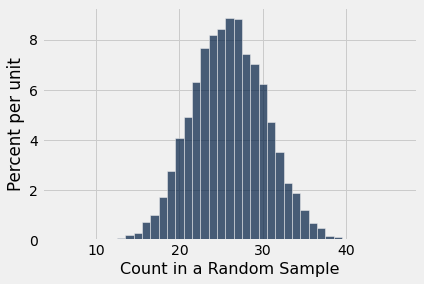

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

The histogram shows us what the model of random selection predicts about our statistic, the number of Black panelists in the sample.

To generate each simulated count, we drew 100 times at random from a population in which 26% were Black. So, as you would expect, most of the simulated counts are around 26. They are not exactly 26: there is some variation. The counts range from about 15 to about 40. 

## Comparing the Prediction and the Data ##
In the panel selected for the trial, there were eight Black panelists. The histogram of simulated counts is redrawn below with value eight shown as a red dot on the horizontal axis. The dot is very far out in the left hand tail of the histogram. Very few of the 10,000 counts simulated by random selection came out to be eight or less. 

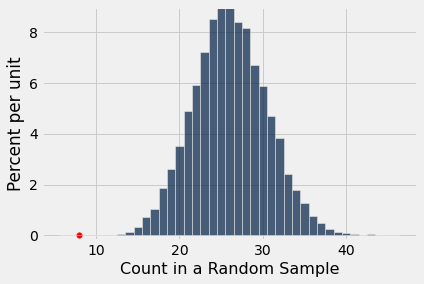

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);               # plt.scatter()

## Conclusion of the Data Analysis ##

<span class="mark">The graph above is a visual display of bias in the selection process. It shows that if we select a panel of size 100 at random from the eligible population, we are very unlikely to get counts of Black panelists that are as low as the eight that were observed on the panel in the trial.</span> 

This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. While it is *possible* that the panel could have been generated by chance, our simulation demonstrates that it is hugely unlikely. 

The reality of the trial panel is very much at odds with the model's assumption of random selection from the eligible population. When the data and a model are inconsistent, the model is hard to justify. After all, the data are real. The model is just a set of assumptions. When assumptions are at odds with reality, we must question those assumptions. 

Therefore the most reasonable conclusion is that the assumption of random selection is unjustified for this jury panel. In other words, the most reasonable conclusion is that the jury panel was *not* selected by random sampling from the population of eligible jurors. Notwithstanding the opinion of the Supreme Court, the difference between 26% and 8% is not so small as to be explained well by chance alone.

## Statistical Bias ##

The analysis above provides quantitative evidence of unfairness in Robert Swain's trial. The data support his position that he was denied the impartial jury to which he was entitled by the U.S. Constitution. 

Additional data show that the exclusion of Black panelists was pervasive. The Supreme Court judgment, written in 1965, includes evidence provided by Robert Swain that "only 10 to 15% of ... jury panels drawn from the jury box since 1953 have been [Black], there having been only one case in which the percentage was as high as 23%." Look at where 10% and 15% lie on the horizontal axis of the histogram above. Values like that are also highly unlikely under random selection from the eligible population.

When a process produces errors that are systematically in one direction – such as the percentage of Black panelists always being lower than expected – then data scientists say the process is *biased*. Quantification of such bias is an important responsibility of data science. 

Arguments such as the one in this section are now more frequently presented in courts of law. In the 1960s, the Supreme Court looked at the data but drew the wrong conclusion that "the overall percentage disparity has been small." For the meaning of "small," it was wrong to rely on what simply seemed reasonable to the majority of the Court. Views on what was reasonable were not only purely subjective, they were also vulnerable to the influence of pervasive racial prejudice. If arguments in the case had included the quantitative analysis of this section, the Court might not have concluded that the percentage disparity was small.

## Racial Bias ##
The statistical bias in the selection process was born out of deep-seated racial bias in the legal system of the time. 

For example, the Supreme Court judgment says that Talladega County jury panels were selected from a jury roll of names that the jury commissioners acquired from "city directories, registration lists, club and church lists, conversations with other persons in the community, both white and [not white], and personal and business acquaintances." This process was clearly biased against Black people and in favor of people in the commissioners' social and professional circles. Such systematic exclusion of Black people from the jury rolls meant that very few Black people were selected for the jury panels.

Even when there were Black panelists, they typically did not make it into the final jury. Of the eight Black men on Robert Swain's jury panel, two were excused and six were eliminated by the prosecution in a process called a *peremptory challenge*. In this process, lawyers for both sides could exclude or *strike* a certain number of panelists without giving a reason. 

Arguing against the unfairness of peremptory challenges was a significant part of Robert Swain's appeal. He noted that "prosecutors have consistently and systematically exercised their strikes to prevent any and all [Black panelists] from serving on the [jury] itself." The Court acknowledged that there had never been a Black juror in any civil or criminal case in Talladega County. But it still denied the appeal.

Racial bias in the legal system derived from bias in society. Prejudice and injustice against Black people had been so prevalent for so long that in many parts of society it had become almost a normal way to think and act. As members of society, the Justices of the Supreme Court were not immune to this. The Court majority presented their decision as the most appropriate and logical interpretation of the law. But it was not. The Court's decision on peremptory challenges was eventually reversed after legal battles that lasted 20 years.

Robert Swain fought a criminal justice system that was stacked against him. Here, we have been able to expose just one aspect of the systemic bias and racism that he faced and that so many other Black people have fought against. For many, the fight continues to this day. We believe that data science can be a powerful ally. 

## Further Reading ##

Robert Swain was represented in the U.S. Supreme Court by [Constance Baker Motley](https://en.wikipedia.org/wiki/Constance_Baker_Motley), the first African-American woman to argue a case in that Court. She argued 10 cases in the Supreme Court and lost only one – Robert Swain's case in 1965.

[Thurgood Marshall](https://en.wikipedia.org/wiki/Thurgood_Marshall), who in 1967 became the first African-American Supreme Court Justice, had studied the Court's decision in Robert Swain's case and pressed for eliminating peremptory challenges that were based on race alone. This was achieved in the 1986 Supreme Court case [Batson v. Kentucky](https://supreme.justia.com/cases/federal/us/476/79/).

But Marshall had concerns about the efficacy of the Batson decision. He anticipated that some legal teams would circumvent it by finding ostensibly race-neutral ways to exclude Black jurors. In his [opinion](https://supreme.justia.com/cases/federal/us/476/79/#tab-opinion-1956655) concurring with the majority of the Court, he recommended going further and banning peremptory challenges altogether. His concluding words were, "I applaud the Court's holding that the racially discriminatory use of peremptory challenges violates the Equal Protection Clause, and I join the Court's opinion. However, only by banning peremptories entirely can such discrimination be ended." Thurgood Marshall's concerns were prescient, as you will see in some of the readings below.

In 2013, Constance Baker Motley was posthumously awarded a [Congressional gold medal](https://www.congress.gov/bill/113th-congress/house-bill/3097/text?r=5&s=1) "in recognition of her enduring contributions and service to the United States." In support of the award, members of the House of Representatives wrote, "Constance Baker Motley's only loss before the United States Supreme Court was in Swain v. Alabama, 380 U.S. 202 (1965), a case in which the Court refused to proscribe race-based peremptory challenges in cases involving African-American defendants and which was later reversed in Batson v. Kentucky, 476 U.S. 79 (1986), on grounds that had been largely asserted by Constance Baker Motley in the Swain case." 

Thurgood Marshall and Constance Baker Motley had other connections. For example, as a student at Columbia Law School, Baker Motley worked as a law clerk for Marshall. Some years later she wrote the original complaint in the landmark civil rights case Brown v. Board of Education in Topeka, which was won by Thurgood Marshall in 1954.

The [NAACP Legal Defense and Educational Fund](https://www.naacpldf.org/) argued Robert [Swain's case](https://www.naacpldf.org/press-release/ldf-marks-anniversary-of-batson-decision-reaffirms-importance-of-impartial-jury-selection/) and later supported the Batson case.

In spite of the Batson decision, racial bias in jury selection persists. Legal scholar and Berkeley Law School alum [Richard L. Harris Jr.](https://www.thehistorymakers.org/biography/robert-lewis-harris) has provided a [detailed account](https://scholarship.law.wm.edu/cgi/viewcontent.cgi?article=1944&context=wmlr) of the biases that are perpetuated by peremptory challenges.  

In their 2020 report [Whitewashing the Jury Box](http://www.clrc.ca.gov/CRPC/Pub/Panelist_Materials/PM-20210325-Semel.pdf): How California Perpetuates the Discriminatory Exclusion of Black and Latinx Jurors,
[Professor Elisabeth Semel](https://www.law.berkeley.edu/our-faculty/faculty-profiles/elisabeth-semel/) and co-authors in the Berkeley Law Death Penalty Clinic describe how Thurgood Marshall's concerns about the effectiveness of the Batson ruling are justified by experience in Californian courts.  

The U.S. Supreme Court [judgment](https://supreme.justia.com/cases/federal/us/380/202/) in the case Swain v. Alabama can be distressing to read. We have included it because some excerpts are quoted in the section. 